In [1]:
library(ggplot2)
library(dplyr)
library(reshape2)
library(ggfittext)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggfittext’ was built under R version 4.3.2”


In [2]:
dir_fig = 'R_trans/'

In [3]:
file_main <- 'test.tsv'
df_main <- read.table(file_main, header = TRUE, sep = "\t")
print(dim(df_main))
df_main

[1] 344736    323


CHROM,POS,END,ID,SVTYPE,PLATFORM,SVLEN,SRC,GENCODE,denovo_LR,⋯,X_LOF_DEV_BR_10_cds,X_LOF_DEV_BR_20_cds,X_LOF_DEV_BR_30_cds,X_LOF_DEV_BR_40_cds,X_LOF_DEV_BR_50_cds,X_PLIp9_LOF_DEV_BR_10_cds,X_PLIp9_DEV_BR_GENE_10,X_PLIp9_DEV_BR_GENE_10_cds,X_PLIp9_DEV_BR_GENE_10_utr,X_PLIp9_DEV_BR_GENE_10_intron
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
chr1,10000,180998,14346589,DUP,LR,170998,Lumpy,start_codon,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,10468,180108,Sniffles2.DEL.1DM0,DEL,LR,-169640,Sniffles_Lumpy,start_codon,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,14848,182483,14346592,DUP,LR,167635,Lumpy,start_codon,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,32024,32024,Sniffles2.INS.1M0,INS,LR,64,Sniffles,.,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,35141,35141,948107_1,BND,LR,24860,Lumpy,exon,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,50938,51054,Sniffles2.DEL.33M0,DEL,LR,-116,Sniffles,.,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,59608,59608,Sniffles2.INS.2M0,INS,LR,318,Sniffles,.,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,67898,68334,Sniffles2.DEL.38M0,DEL,LR,-436,Sniffles,.,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,77175,77175,Sniffles2.INS.17M0,INS,LR,57,Sniffles,.,.,⋯,0,0,0,0,0,0,0,0,0,0


In [26]:
include_svtypes = c('INS', 'DEL', 'DUP', 'INV', '.')

############################# all
flt_name = 'AD3_SAMPLES'
flt_freq = 0.05
fig_name1 = paste(dir_fig, "transmission_chisq_test_all_", flt_name, "_freq", flt_freq, ".png", sep='')
fig_name2 = paste(dir_fig, "transmission_binomial_test_all_", flt_name, "_freq", flt_freq, ".png", sep='')
df_flt <- df_main %>%
filter(SVTYPE %in% include_svtypes) %>%
filter(!!as.symbol(paste('freq_', flt_name, sep="")) <= flt_freq) %>%
filter((SD_ART != 1) | PLATFORM != "LR") %>%
filter((!!as.symbol(paste('NUM_', flt_name, sep="")) > 0) | (NUM_IL_SAMPLES > 0))
#############################

############################# IL only
#flt_name = 'AD3_SAMPLES'
#flt_freq = 0.05
#fig_name2 = paste(dir_fig, "transmission_binomial_test_ILLonly_", flt_name, "_freq", flt_freq, ".png", sep='')
#df_flt <- df_main %>%
#filter(SVTYPE %in% include_svtypes) %>%
#filter(!!as.symbol(paste('freq_', flt_name, sep="")) <= flt_freq) %>%
#filter(PLATFORM == "IL")
#############################

############################# not-IL only
#flt_name = 'AD3_SAMPLES'
#flt_freq = 0.05
#fig_name2 = paste(dir_fig, "transmission_binomial_test_LRLonly_", flt_name, "_freq", flt_freq, ".png", sep='')
#df_flt <- df_main %>%
#filter(SVTYPE %in% include_svtypes) %>%
#filter(!!as.symbol(paste('freq_', flt_name, sep="")) <= flt_freq) %>%
#filter((SD_ART != 1) | PLATFORM != "LR") %>%
#filter(PLATFORM != "IL") %>%
#filter((!!as.symbol(paste('NUM_', flt_name, sep="")) > 0) | (NUM_IL_SAMPLES > 0))
#############################

##########################################################

############################# all
#flt_name = 'SQ40_SAMPLES'
#flt_freq = .05
#fig_name2 = paste(dir_fig, "transmission_binomial_test_all_", flt_name, "_freq", flt_freq, ".png", sep='')
#df_flt <- df_main %>%
#filter(SVTYPE %in% include_svtypes) %>%
#filter(!!as.symbol(paste('freq_', flt_name, sep="")) <= flt_freq) %>%
#filter((SD_ART != 1) | PLATFORM != "LR") %>%
#filter((!!as.symbol(paste('NUM_', flt_name, sep="")) > 0) | (NUM_IL_SAMPLES > 0))
#############################

############################# IL only
#flt_name = 'SQ40_SAMPLES'
#flt_freq = 0.05
#fig_name2 = paste(dir_fig, "transmission_binomial_test_ILLonly_", flt_name, "_freq", flt_freq, ".png", sep='')
#df_flt <- df_main %>%
#filter(SVTYPE %in% include_svtypes) %>%
#filter(!!as.symbol(paste('freq_', flt_name, sep="")) <= flt_freq) %>%
#filter(PLATFORM == "IL")
#############################

############################# not-IL only
#flt_name = 'SQ40_SAMPLES'
#flt_freq = 0.05
#fig_name2 = paste(dir_fig, "transmission_binomial_test_LRLonly_", flt_name, "_freq", flt_freq, ".png", sep='')
#df_flt <- df_main %>%
#filter(SVTYPE %in% include_svtypes) %>%
#filter(!!as.symbol(paste('freq_', flt_name, sep="")) <= flt_freq) %>%
#filter((SD_ART != 1) | PLATFORM != "LR") %>%
#filter(PLATFORM != "IL") %>%
#filter((!!as.symbol(paste('NUM_', flt_name, sep="")) > 0) | (NUM_IL_SAMPLES > 0))
#############################

dim(df_flt)
#paste('freq_', flt_name, sep="")

[1] 27669   323

In [27]:
fts = c('LOF_FDR_ASD_cds', 'LOF_FDR_DD_cds', 'LOF_FDR_NDD_cds', 
        'LOF_DEV_BR_10_cds', 'PLIp9_LOF_DEV_BR_10_cds', 
        'LOF_PLIp9_cds', 'LOF_LOWPLI_cds',
        'FDR_ASD_cds', 'FDR_DD_cds', 'FDR_NDD_cds', 
        'DEV_BR_GENE_10_cds', 'PLIp9_DEV_BR_GENE_10_cds', 
        'PLIp9_cds', 'LOWPLI_cds',
        'FDR_ASD_utr', 'FDR_DD_utr', 'FDR_NDD_utr', 
        'DEV_BR_GENE_10_utr', 'PLIp9_DEV_BR_GENE_10_utr',
        'PLIp9_utr', 'LOWPLI_utr',
        'FDR_ASD_intron', 'FDR_DD_intron', 'FDR_NDD_intron', 
        'DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_intron',
        'PLIp9_intron', 'LOWPLI_intron',
        'FB_PR', 'FB_ENH', 'GNOCCHI_4', 'GNOCCHI_3', 'GNOCCHI_2')
fts_labels = c('LOF ASD FDR, CDS', 'LOF DD FDR, CDS', 'LOF NDD FDR, CDS', 
               'LOF dev. brain genes, CDS', 'LOF dev. brain pLI≥.9 genes, CDS', 
               'LOF pLI≥.9, CDS', 'LOF pLI≤.9, CDS',
               'ASD FDR, CDS', 'DD FDR, CDS', 'NDD FDR, CDS', 
               'dev. brain genes, CDS', 'dev. brain pLI≥.9 genes, CDS', 
               'pLI≥.9, CDS', 'pLI≤.9, CDS',
               'ASD FDR, UTR', 'DD FDR, UTR', 'NDD FDR, UTR', 
               'dev. brain genes, UTR', 'dev. brain pLI≥.9 genes, UTR',
               'pLI≥.9, UTR', 'pLI≤.9, UTR',
               'ASD FDR, intron', 'DD FDR, intron', 'NDD FDR, intron', 
               'dev. brain genes, intron', 'dev. brain pLI≥.9 genes, intron',
               'pLI≥.9, intron', 'pLI≤.9, intron', 
               'fetal brain promoter', 'fetal brain enhancer', 'Gnocchi≥4', 'Gnocchi≥3', 'Gnocchi≥2')

print_stuff = F

ORs = c()
pvals = c()
tr_cases = c()
ntr_cases = c()
tr_cons = c()
ntr_cons = c()
pval.bin.cases = c()
pval.bin.controls = c()
lb.bin.cases = c()
lb.bin.controls = c()
ub.bin.cases = c()
ub.bin.controls = c()
tr.rate.cases = c()
tr.rate.controls = c()
#for (ft in fts[c(11:11)]) {
for (ft in fts) {
    var = paste('X_', ft, sep="")
    print(var)

    df_w = df_flt[df_flt[paste('X_', ft, sep="")] == 1,]
    #print(dim(df_w))
    #print('SVs intersecting:', ft, dim(df_w))

    tran_case = sum(df_w[paste('NUM_tran_case_', flt_name, sep="")])
    tran_control = sum(df_w[paste('NUM_tran_control_', flt_name, sep="")])
    nontran_case = sum(df_w[paste('NUM_nontran_case_', flt_name, sep="")])
    nontran_control = sum(df_w[paste('NUM_nontran_control_', flt_name, sep="")])
    if (print_stuff) {
        cat('tran_case:', tran_case, '\n')
        cat('tran_control:', tran_control, '\n')
        cat('nontran_case:', nontran_case, '\n')
        cat('nontran_control:', nontran_control, '\n')
    }

    tr_cases = c(tr_cases, tran_case)
    ntr_cases = c(ntr_cases, nontran_case)
    tr_cons = c(tr_cons, tran_control)
    ntr_cons = c(ntr_cons, nontran_control)
        
    OR = (tran_case / tran_control) / (nontran_case / nontran_control)
    ORs = c(ORs, OR)
    ctable = matrix(c(tran_case, nontran_case, tran_control, nontran_control), nrow=2, byrow=TRUE)
    rownames(ctable) <- c("Case", "Control")
    colnames(ctable) <- c("Tran", "non-Tran")

    chi_sq_test <- chisq.test(ctable)
    pval = chi_sq_test$p.value
    pvals = c(pvals, pval)
    if (print_stuff) {
        print(ctable)
        print(chi_sq_test)
        #print(str(chi_sq_test))
        print('pval:')
        print(pval)
    }

    p = .5
    if (tran_case+nontran_case > 0) {
        #binom.result.case <- binom.test(tran_case, tran_case+nontran_case, p, alternative = "greater")
        binom.result.case <- binom.test(tran_case, tran_case+nontran_case, p, alternative = "two.sided")
        pval.bin.case = binom.result.case$p.value
        lb.bin.case = binom.result.case$conf.int[1]
        ub.bin.case = binom.result.case$conf.int[2]
        tr.rate.case = unname(binom.result.case$estimate)[1]
        pval.bin.cases = c(pval.bin.cases, pval.bin.case)
        lb.bin.cases = c(lb.bin.cases, lb.bin.case)
        ub.bin.cases = c(ub.bin.cases, ub.bin.case)
        tr.rate.cases = c(tr.rate.cases, tr.rate.case)
    }
    else {
        binom.result.case <- NULL
        pval.bin.case = NaN
        lb.bin.case = NaN
        ub.bin.case = NaN
        tr.rate.case = NaN
        pval.bin.cases = c(pval.bin.cases, pval.bin.case)
        lb.bin.cases = c(lb.bin.cases, lb.bin.case)
        ub.bin.cases = c(ub.bin.cases, ub.bin.case)
        tr.rate.cases = c(tr.rate.cases, tr.rate.case)
    }
    if (tran_control+nontran_control > 0) {
        #binom.result.control <- binom.test(tran_control, tran_control+nontran_control, p, alternative = "less")
        binom.result.control <- binom.test(tran_control, tran_control+nontran_control, p, alternative = "two.sided")
        pval.bin.control = binom.result.control$p.value
        lb.bin.control = binom.result.control$conf.int[1]
        ub.bin.control = binom.result.control$conf.int[2]
        tr.rate.control = unname(binom.result.control$estimate)[1]
        pval.bin.controls = c(pval.bin.controls, pval.bin.control)
        lb.bin.controls = c(lb.bin.controls, lb.bin.control)
        ub.bin.controls = c(ub.bin.controls, ub.bin.control)
        tr.rate.controls = c(tr.rate.controls, tr.rate.control)
    }
    else {
        binom.result.control <- NULL
        pval.bin.control = NaN
        lb.bin.control = NaN
        ub.bin.control = NaN
        tr.rate.control = NaN
        pval.bin.controls = c(pval.bin.controls, pval.bin.control)
        lb.bin.controls = c(lb.bin.controls, lb.bin.control)
        ub.bin.controls = c(ub.bin.controls, ub.bin.control)
        tr.rate.controls = c(tr.rate.controls, tr.rate.control)
    }

    if (print_stuff) {
        print(binom.result.case)
        print(binom.result.control)
        print('pval.bin.case:')
        print(pval.bin.case)
        print('pval.bin.control:')
        print(pval.bin.control)
        print('lb.bin.case:')
        print(lb.bin.case)
        print('ub.bin.case:')
        print(ub.bin.case)
        print('lb.bin.control:')
        print(lb.bin.control)
        print('ub.bin.control:')
        print(ub.bin.control)
        print('tr.rate.case:')
        print(tr.rate.case)
        print('tr.rate.control:')
        print(tr.rate.control)
        print(str(binom.result.case))
        print(str(binom.result.control))
    }
}

tr_case_ntr_case = paste(as.character(tr_cases), as.character(ntr_cases), sep='/')
tr_con_ntr_con = paste(as.character(tr_cons), as.character(ntr_cons), sep='/')

print('ORs:')
print(ORs)
print('pvals:')
print(pvals)
print('tr_case_ntr_case:')
print(tr_case_ntr_case)
print('tr_con_ntr_con:')
print(tr_con_ntr_con)
print('pval.bin.cases:')
print(pval.bin.cases)
print('pval.bin.controls:')
print(pval.bin.controls)
print('lb.bin.cases:')
print(lb.bin.cases)
print('lb.bin.controls:')
print(lb.bin.controls)
print('ub.bin.cases:')
print(ub.bin.cases)
print('ub.bin.controls:')
print(ub.bin.controls)
print('tr.rate.cases:')
print(tr.rate.cases)
print('tr.rate.controls:')
print(tr.rate.controls)

[1] "X_LOF_FDR_ASD_cds"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_LOF_FDR_DD_cds"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_LOF_FDR_NDD_cds"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_LOF_DEV_BR_10_cds"
[1] "X_PLIp9_LOF_DEV_BR_10_cds"
[1] "X_LOF_PLIp9_cds"
[1] "X_LOF_LOWPLI_cds"
[1] "X_FDR_ASD_cds"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_FDR_DD_cds"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_FDR_NDD_cds"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_DEV_BR_GENE_10_cds"
[1] "X_PLIp9_DEV_BR_GENE_10_cds"
[1] "X_PLIp9_cds"
[1] "X_LOWPLI_cds"
[1] "X_FDR_ASD_utr"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_FDR_DD_utr"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_FDR_NDD_utr"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_DEV_BR_GENE_10_utr"
[1] "X_PLIp9_DEV_BR_GENE_10_utr"
[1] "X_PLIp9_utr"
[1] "X_LOWPLI_utr"
[1] "X_FDR_ASD_intron"
[1] "X_FDR_DD_intron"
[1] "X_FDR_NDD_intron"
[1] "X_DEV_BR_GENE_10_intron"
[1] "X_PLIp9_DEV_BR_GENE_10_intron"
[1] "X_PLIp9_intron"
[1] "X_LOWPLI_intron"
[1] "X_FB_PR"
[1] "X_FB_ENH"
[1] "X_GNOCCHI_4"
[1] "X_GNOCCHI_3"
[1] "X_GNOCCHI_2"
[1] "ORs:"
 [1]       NaN 0.7368421 0.7619048 2.1914580 3.2222222 2.4807692 0.8235756
 [8]       NaN 0.3076923 0.2413793 2.0111910 2.2725694 2.0467836 0.9095280
[15] 0.0000000 0.5416667 0.7466667 0.8615385 0.3676471 0.8360656 1.0171126
[22] 1.0804303 0.9476074 1.0390431 0.9196156 0.8268022 0.8884561 0.9824926
[29] 0.8916874 0.9842569 0.9350282 1.0066039 1.0701125
[1] "pvals:"
 [1]        NaN 1.00000000 1.00000000 0.03650656 0.03498373 0.01858137
 [7] 0.22784612        NaN 0.71439304 0.45010994 0.03384662 0.09672897
[13] 0.02980974 0.49686314 1.00000000 0.80761168 1.00000000 0.87207819
[19] 0.22221295 0.79425121 1.00000000 0.77991131 0.

In [19]:
# make binomial test dataframe
my_data2 = data.frame('fts' = fts, 'fts_labels' = fts_labels,
                      'tr.rate.cases' = tr.rate.cases, 'tr.rate.controls' = tr.rate.controls, 
                      'lb.bin.cases' = lb.bin.cases, 'ub.bin.cases' = ub.bin.cases, 
                      'lb.bin.controls' = lb.bin.controls, 'ub.bin.controls' = ub.bin.controls, 
                      'pval.bin.cases' = pval.bin.cases, 'pval.bin.controls' = pval.bin.controls, 
                      'tr_case_ntr_case' = tr_case_ntr_case, 'tr_con_ntr_con' = tr_con_ntr_con)

my_data2.melt = melt(my_data2, id.vars = c('fts', 'fts_labels', 'lb.bin.cases', 'ub.bin.cases', 
                                           'lb.bin.controls', 'ub.bin.controls', 'pval.bin.cases', 'pval.bin.controls', 
                                           'tr_case_ntr_case', 'tr_con_ntr_con'), 
                     variable.name = 'case_control', value.name = 'TR_rate')

my_data2.melt <- transform(my_data2.melt, lb.bin = ifelse(case_control=='tr.rate.cases', lb.bin.cases, lb.bin.controls))
my_data2.melt <- transform(my_data2.melt, ub.bin = ifelse(case_control=='tr.rate.cases', ub.bin.cases, ub.bin.controls))
my_data2.melt <- transform(my_data2.melt, tr_ntr = ifelse(case_control=='tr.rate.cases', tr_case_ntr_case, tr_con_ntr_con))

get_pval_char <- function(pval) {
    if (is.na(pval)) {return('')}
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
    }
sig.cases <- sapply(my_data2.melt$pval.bin.cases, get_pval_char)
sig.controls <- sapply(my_data2.melt$pval.bin.controls, get_pval_char)
print(sig.cases)
print(sig.controls)
my_data2.melt$sig.cases = sig.cases
my_data2.melt$sig.controls = sig.controls
my_data2.melt <- transform(my_data2.melt, sig = ifelse(case_control=='tr.rate.cases', sig.cases, sig.controls))
(my_data2.melt)

 [1] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""
[26] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""
[51] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""
 [1] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""
[26] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""
[51] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""


fts,fts_labels,lb.bin.cases,ub.bin.cases,lb.bin.controls,ub.bin.controls,pval.bin.cases,pval.bin.controls,tr_case_ntr_case,tr_con_ntr_con,case_control,TR_rate,lb.bin,ub.bin,tr_ntr,sig.cases,sig.controls,sig
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
LOF_FDR_ASD_cds,"LOF ASD FDR, CDS",0.000000000,0.9750000,NaN,NaN,1.00000000,NaN,0/1,0/0,tr.rate.cases,0.0000000,0.000000000,0.9750000,0/1,,,
LOF_FDR_DD_cds,"LOF DD FDR, CDS",0.008403759,0.9057007,NaN,NaN,1.00000000,NaN,1/2,0/0,tr.rate.cases,0.3333333,0.008403759,0.9057007,1/2,,,
LOF_FDR_NDD_cds,"LOF NDD FDR, CDS",0.052744951,0.8533672,NaN,NaN,1.00000000,NaN,2/3,0/0,tr.rate.cases,0.4000000,0.052744951,0.8533672,2/3,,,
LOF_DEV_BR_10_cds,"LOF dev. brain genes, CDS",0.410337216,0.7165063,0.2623781,0.8784477,0.45138083,0.7539063,25/19,6/4,tr.rate.cases,0.5681818,0.410337216,0.7165063,25/19,,,
PLIp9_LOF_DEV_BR_10_cds,"LOF dev. brain pLI≥.9 genes, CDS",0.440650313,0.8135933,0.2120085,0.8630043,0.18493334,1.0000000,18/10,5/4,tr.rate.cases,0.6428571,0.440650313,0.8135933,18/10,,,
LOF_PLIp9_cds,"LOF pLI≥.9, CDS",0.432820891,0.7437091,0.1182411,0.6161963,0.27995624,0.3017578,25/17,5/10,tr.rate.cases,0.5952381,0.432820891,0.7437091,25/17,,,
LOF_LOWPLI_cds,"LOF pLI≤.9, CDS",0.442506928,0.5806361,0.3380178,0.6619822,0.78410338,1.0000000,109/104,20/20,tr.rate.cases,0.5117371,0.442506928,0.5806361,109/104,,,
FDR_ASD_cds,"ASD FDR, CDS",0.008403759,0.9057007,NaN,NaN,1.00000000,NaN,1/2,0/0,tr.rate.cases,0.3333333,0.008403759,0.9057007,1/2,,,
FDR_DD_cds,"DD FDR, CDS",0.043271868,0.7772219,0.0250000,1.0000000,0.68750000,1.0000000,2/4,1/0,tr.rate.cases,0.3333333,0.043271868,0.7772219,2/4,,,


[1] "R_trans/transmission_binomial_test_all_AD5_SAMPLES_freq0.01.png"


Warning message:
“Removed 6 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range (`geom_text()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range (`geom_text()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range (`geom_text()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range (`geom_text()`).”


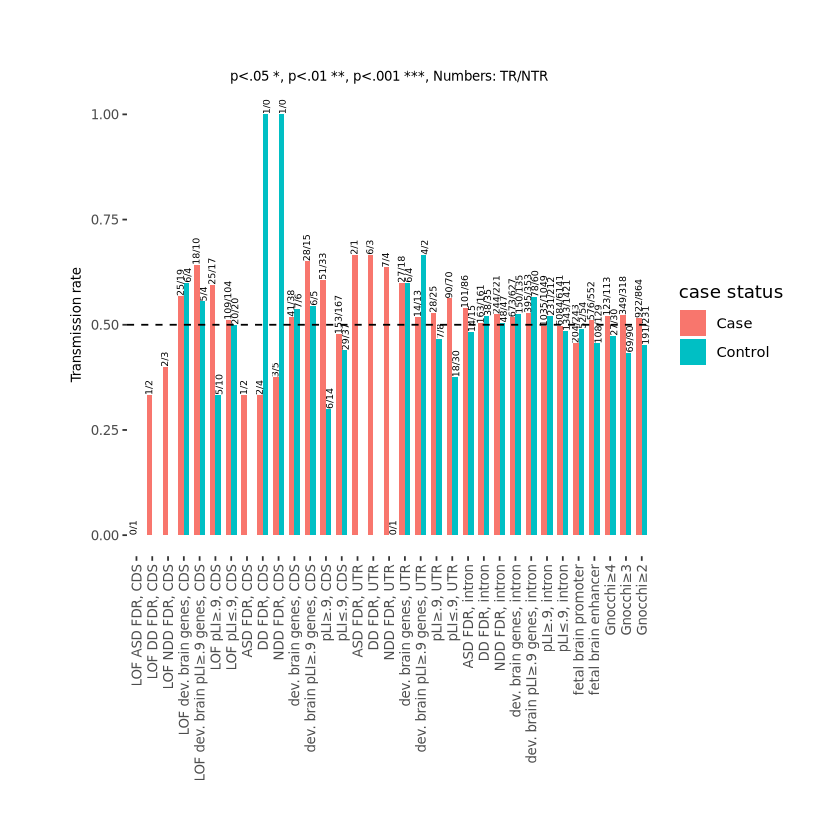

In [20]:
# plot binomial test results
print(fig_name2)
#y_sig = .05
#y_sig = 0.75
#y_sig = 0.3
y_sig = 3.5
#y_sig = 1.2
#y_sig = 1.7
size_txt = 8
size_sig = 4
label_pos = -.5
label_pos2 = 2.6

#, label = sum_case_con)
#  geom_errorbar(aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
# , title = "Numbers up: #Tr./#non-Tr. controls, down:  #Tr./#non-Tr. cases"
# label=my_data2.melt$sig,

ggplot(my_data2.melt, aes(x = fts, y = TR_rate, fill = case_control, ymin=lb.bin , ymax=ub.bin, label=TR_rate)) +
  geom_bar(position = position_dodge(), stat = "identity", width = 0.7) +
  #geom_errorbar(position = position_dodge(width = 0.9), colour = "black") +
  geom_hline(yintercept = .5, linetype = "dashed", color = "black") +
  # from `ggfittext`
  #geom_bar_text(position = "dodge", aes(label = TR_rate), place = "top", grow = TRUE, 
  #              reflow = TRUE, min.size = 5, contrast = TRUE) +
  geom_text(aes(label = sig), position=position_dodge(width=0.9), angle=90, hjust=1, vjust=0.5) +
  geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
  labs(y = "Transmission rate", title = "p<.05 *, p<.01 **, p<.001 ***, Numbers: TR/NTR") +
  theme(axis.text=element_text(size=size_txt),
        axis.text.x = element_text(angle = 90, vjust = .5, hjust=1, size=size_txt),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=size_txt),
        plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5, size=size_txt)
        #axis.line = element_line(),
       ) +
  scale_x_discrete(limits=fts, labels=fts_labels) +
  scale_fill_discrete(name = 'case status', labels = c("Case", "Control"))
  #scale_x_discrete(labels=my_data2.melt$fts_labels) 
  #+
  #annotate("text", x=1:dim(my_data2.melt)[1], y=y_sig, label= sig, size=size_sig) +
  #geom_text(aes(x = fts, y = label_pos, label = tr_case_ntr_case), angle=90, hjust=0, size=2) +
  #geom_text(aes(x = fts, y = label_pos2, label = tr_con_ntr_con), angle=90, hjust=0, size=2)
  # + 
  #ylim(-0.1, .46)
#, vjust=0, hjust=2

ggsave(fig_name2, width = 10, height = 6)

  #geom_text(vjust=0, angle=45) +
#axis.text=element_text(size=12),
#
#geom_bar(stat = "identity", fill = "lightblue", color = "black") +

In [28]:
# make chi-squared test dataframe
my_data = data.frame('ORs' = ORs, 'pvals' = pvals, 'fts' = fts, 'fts_labels' = fts_labels, 
                     'tr_case_ntr_case' = tr_case_ntr_case, 'tr_con_ntr_con' = tr_con_ntr_con)
my_data$fts <- factor(my_data$fts, levels = my_data$fts)
#my_data <- my_data[!is.infinite(my_data$ORs_plus),]
get_pval_char <- function(pval) {
    if (is.na(pval)) {return('')}
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
    }
sig <- sapply(my_data$pvals, get_pval_char)
print(sig)
my_data$sig = sig
my_data

 [1] ""  ""  ""  "*" "*" "*" ""  ""  ""  ""  "*" ""  "*" ""  ""  ""  ""  ""  "" 
[20] ""  ""  ""  ""  ""  ""  "*" "*" ""  ""  ""  ""  ""  "" 


ORs,pvals,fts,fts_labels,tr_case_ntr_case,tr_con_ntr_con,sig
<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>
NaN,NaN,LOF_FDR_ASD_cds,"LOF ASD FDR, CDS",4/4,0/0,
0.7368421,1.00000000,LOF_FDR_DD_cds,"LOF DD FDR, CDS",14/19,1/1,
0.7619048,1.00000000,LOF_FDR_NDD_cds,"LOF NDD FDR, CDS",16/21,1/1,
2.1914580,0.03650656,LOF_DEV_BR_10_cds,"LOF dev. brain genes, CDS",96/97,14/31,*
3.2222222,0.03498373,PLIp9_LOF_DEV_BR_10_cds,"LOF dev. brain pLI≥.9 genes, CDS",58/48,6/16,*
2.4807692,0.01858137,LOF_PLIp9_cds,"LOF pLI≥.9, CDS",86/80,13/30,*
0.8235756,0.22784612,LOF_LOWPLI_cds,"LOF pLI≤.9, CDS",393/509,105/112,
NaN,NaN,FDR_ASD_cds,"ASD FDR, CDS",5/5,0/0,
0.3076923,0.71439304,FDR_DD_cds,"DD FDR, CDS",16/26,2/1,


[1] "R_trans/transmission_chisq_test_all_AD3_SAMPLES_freq0.05.png"


Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_bar()`).”


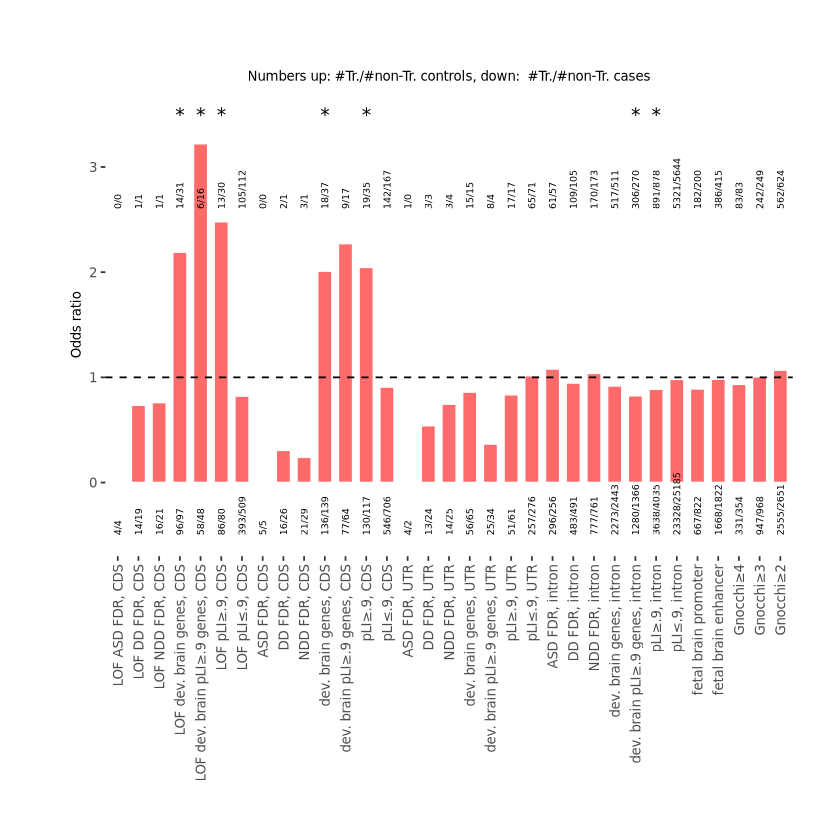

In [29]:
# plot chi-squared test results
print(fig_name1)
#y_sig = .05
#y_sig = 0.75
#y_sig = 0.3
y_sig = 3.5
#y_sig = 1.2
#y_sig = 1.7
size_txt = 8
size_sig = 4
label_pos = -.5
label_pos2 = 2.6

#, label = sum_case_con)
#  geom_errorbar(aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
#

#ggplot(my_data, aes(x = fts, y = ORs, label = sprintf('%1.4f', ano_pval))) +
ggplot(my_data, aes(x = fts, y = ORs)) +
  geom_bar(stat = "identity", fill = "indianred1", color = "white", width = 0.7) +
  geom_hline(yintercept = 1, linetype = "dashed", color = "black") +
  labs(y = "Odds ratio", title = "Numbers up: #Tr./#non-Tr. controls, down:  #Tr./#non-Tr. cases") +
  theme(axis.text=element_text(size=size_txt),
        axis.text.x = element_text(angle = 90, vjust = .5, hjust=1, size=size_txt),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=size_txt),
        plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5, size=size_txt)
        #axis.line = element_line(),
       ) +
  scale_x_discrete(labels=my_data$fts_labels) +
  annotate("text", x=1:dim(my_data)[1], y=y_sig, label= sig, size=size_sig) +
  geom_text(aes(x = fts, y = label_pos, label = tr_case_ntr_case), angle=90, hjust=0, size=2) +
  geom_text(aes(x = fts, y = label_pos2, label = tr_con_ntr_con), angle=90, hjust=0, size=2)
  # + 
  #ylim(-0.1, .46)
#, vjust=0, hjust=2

ggsave(fig_name1, width = 5, height = 5)

  #geom_text(vjust=0, angle=45) +
#axis.text=element_text(size=12),
#
#geom_bar(stat = "identity", fill = "lightblue", color = "black") +